In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scores/exam6.txt


In [2]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.preprocessing import PolynomialFeatures

In [3]:
header_list=["test-1","test-2","selected"]
df=pd.read_csv("../input/scores/exam6.txt",header=None,names=header_list)

In [4]:
df.shape

(118, 3)

In [5]:
df.head()

,test-1,test-2,selected
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
df.tail()

,test-1,test-2,selected
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [7]:
X=df.iloc[:,:2]
y=df.iloc[:,2]

In [8]:
X

,test-1,test-2
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [9]:
y==1

0       True
1       True
2       True
3       True
4       True
       ...  
113    False
114    False
115    False
116    False
117    False
Name: selected, Length: 118, dtype: bool

In [10]:
X[y==1]['test-1']

0     0.051267
1    -0.092742
2    -0.213710
3    -0.375000
4    -0.513250
5    -0.524770
6    -0.398040
7    -0.305880
8     0.016705
9     0.131910
10    0.385370
11    0.529380
12    0.638820
13    0.736750
14    0.546660
15    0.322000
16    0.166470
17   -0.046659
18   -0.173390
19   -0.478690
20   -0.605410
21   -0.628460
22   -0.593890
23   -0.421080
24   -0.115780
25    0.201040
26    0.466010
27    0.673390
28   -0.138820
29   -0.294350
30   -0.265550
31   -0.161870
32   -0.173390
33   -0.282830
34   -0.363480
35   -0.300120
36   -0.236750
37   -0.063940
38    0.062788
39    0.229840
40    0.293200
41    0.483290
42    0.644590
43    0.460250
44    0.627300
45    0.575460
46    0.725230
47    0.224080
48    0.442970
49    0.322000
50    0.137670
51   -0.006336
52   -0.092742
53   -0.207950
54   -0.207950
55   -0.438360
56   -0.219470
57   -0.138820
Name: test-1, dtype: float64

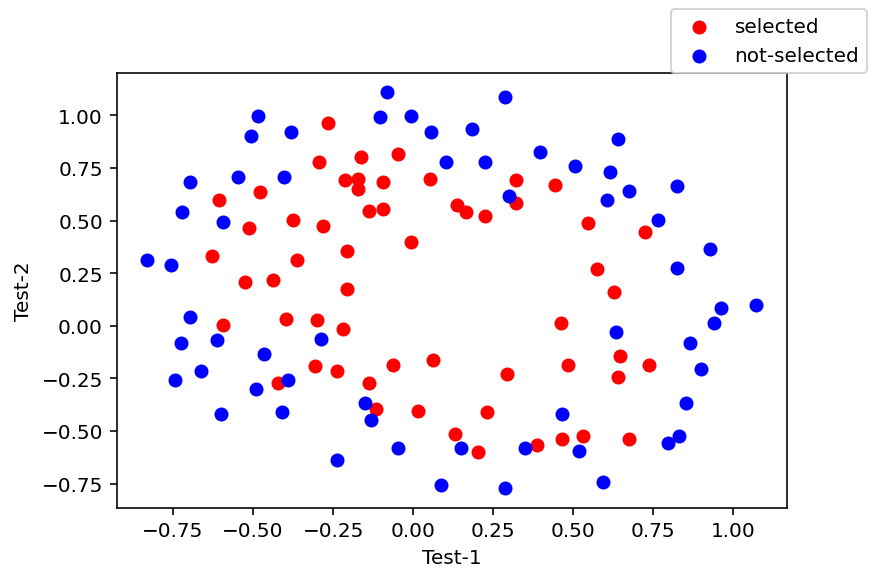

In [11]:
# Implement scatter plot to visualize decision boundary
plt.scatter(X[y==1]['test-1'],X[y==1]['test-2'],c='red',label="selected")
plt.scatter(X[y==0]['test-1'],X[y==0]['test-2'],c='blue',label="not-selected")
plt.xlabel("Test-1")
plt.ylabel("Test-2")
plt.figlegend()


In [12]:
def plot_boundary(clf, X, y, grid_step=0.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [13]:
poly=PolynomialFeatures(6)
X_poly=poly.fit_transform(X)


In [14]:
X_poly.shape

(118, 28)

In [15]:
# logr=LogisticRegression()
# logr.fit(X_poly,y)
# plot_boundary(logr,X,y,0.005,None)